### Step 1 : Importing necessary libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2 : Loaad the dataset : 

In [2]:
# load the dataset
df=pd.read_csv("AppsClub_events_data.csv")

# Set 'Session ID' as the index 
df.set_index('Session ID',inplace=True)

### Step 3 : Handling missing values :
        - Chec for missing values :
        - Fill missing numerical values with the average :
        - Fill missing categorical values with the most frequent value :

In [3]:
# Chec for missing values :
df.isnull().sum()

Event Name         0
Date               0
Attendees Count    1
Rating             3
Speaker            0
New Attendees      0
Online/Offline     3
Duration           0
dtype: int64

In [4]:
# Fill missing numerical values with the average :
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df['Attendees Count'].fillna(df['Attendees Count'].mean(),inplace=True)


C:\Users\Windows\AppData\Local\Temp\ipykernel_18416\1561049812.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mean(),inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_18416\1561049812.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [5]:
# Fill missing categorical values with the most frequent value :
df['Online/Offline'].fillna(df['Online/Offline'].mode()[0],inplace=True)

C:\Users\Windows\AppData\Local\Temp\ipykernel_18416\316453469.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Online/Offline'].fillna(df['Online/Offline'].mode()[0],inplace=True)


In [6]:
# Verification :
df.isnull().sum()

Event Name         0
Date               0
Attendees Count    0
Rating             0
Speaker            0
New Attendees      0
Online/Offline     0
Duration           0
dtype: int64

### Step 4 : Event Analysis :
    - Group by name and calculate average attendees and rating :
    - Compare online vs . offline events :

In [7]:
# Group by event name and calculate average attendance rating :
event_analysis = df.groupby('Event Name').agg({
    'Attendees Count':'mean',
    'Rating':'mean'
}).reset_index()

In [8]:
event_analysis

,Event Name,Attendees Count,Rating
0,AppsChill,25.000000,4.500000
1,Biweekly Contest,20.000000,4.300000
2,CP Bootcamp,57.500000,4.700000
3,Conference,150.000000,5.000000
4,Cyber Security Foundations,31.166667,4.358527
5,Intro to CS,50.181818,4.184144
6,Intro to Data,26.250000,3.950000
7,Java,20.000000,4.133333
8,Let's Talk,80.000000,5.000000
9,Meet Our Laureat,70.000000,4.900000


In [9]:
# compare online vs. offline event :

online_offline_analysis = df.groupby('Online/Offline').agg({
    'Attendees Count':'mean',
    'Rating':'mean'
}).reset_index()

### Step 5 : Identify the Most least Popular events :
    - Rank events by attendance count
    - Top 5 most attended events
    - Bottom 5 least attended events
    - Create a bar chart for all events by attendance count

In [10]:
# rank events by attendance count :
event_attendance = df.groupby('Event Name')['Attendees Count'].mean().sort_values(ascending=False)

# Top most attended events :
top_5_events = event_attendance.head(5)

# Bottom 5 least attended events :
Bottom_5_events = event_attendance.tail(5)

In [11]:
top_5_events

Event Name
Conference          150.0
PFA-PFE             100.0
Let's Talk           80.0
Visite Code 212      70.0
Meet Our Laureat     70.0
Name: Attendees Count, dtype: float64

In [12]:
Bottom_5_events


Event Name
Cyber Security Foundations    31.166667
Intro to Data                 26.250000
AppsChill                     25.000000
Biweekly Contest              20.000000
Java                          20.000000
Name: Attendees Count, dtype: float64

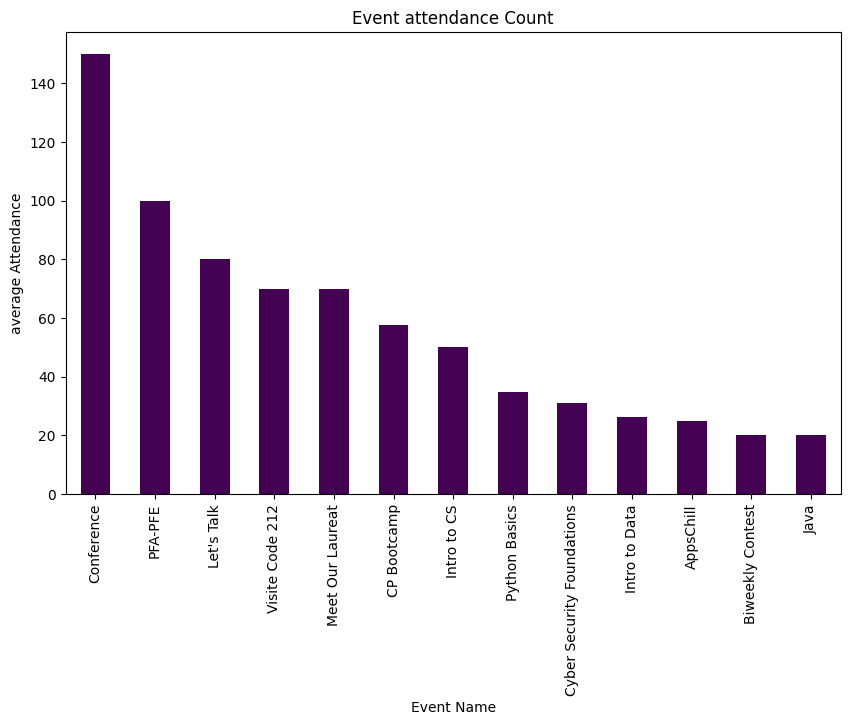

In [13]:
# Create a bar chart for all events by attendance count :
plt.figure(figsize=(10,6))
event_attendance.plot(kind='bar', colormap='viridis')
plt.title('Event attendance Count')
plt.xlabel('Event Name')
plt.ylabel('average Attendance')
plt.show()

### Step 6 : Analyse Event Duration vs. Feedback Score :
    - Scatter plot for duration vs. rating

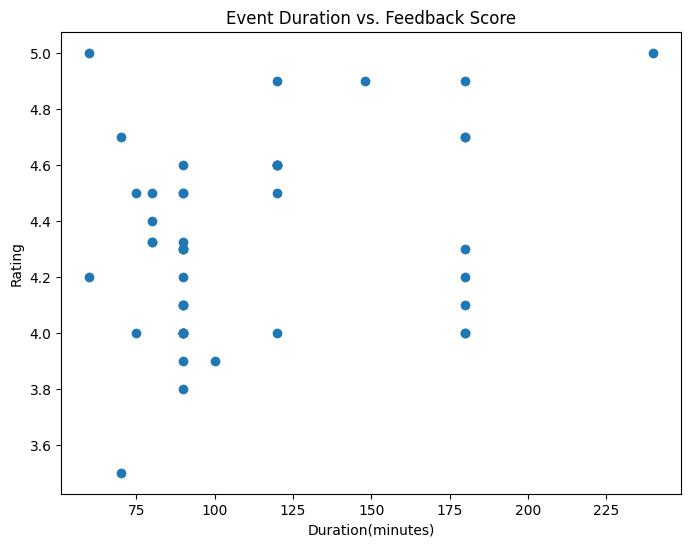

In [14]:
# Scatter plot for duration vs . rating :
plt.figure(figsize=(8,6))
plt.scatter(df['Duration'],df['Rating'])
plt.title('Event Duration vs. Feedback Score')
plt.xlabel('Duration(minutes)')
plt.ylabel('Rating')
plt.show()

### Step 7 : Count events organized by each member :


In [17]:
# Count events organized by each member :

events_by_speaker = df['Speaker'].value_counts().reset_index()
events_by_speaker.columns = ['Speaker', 'Number of Events']

print(events_by_speaker)

               Speaker  Number of Events
0      Amine Ait Hamma                15
1      Hasnae Amarmach                 9
2          Ilyas Nmili                 8
3       Broad Sec Cell                 6
4   Nohaila El Idrissi                 4
5  Youssef Taguejgalet                 4


### Step 8 : Identify the most Active member :

In [18]:
# most active member :

most_active_member = events_per_speaker.iloc[0]
most_active_member

Speaker    Amine Ait Hamma
count                   15
Name: 0, dtype: object

### Step 9 : Best_Rated Organizing Member : 
    - Calculate the average rating per speaker .
    - Find the highest rating .

In [19]:
# Calculate average Rating per Speaker :

speaker_ratings = df.groupby('Speaker')['Rating'].mean().reset_index()
speaker_ratings


,Speaker,Rating
0,Amine Ait Hamma,4.373333
1,Broad Sec Cell,4.358527
2,Hasnae Amarmach,4.180620
3,Ilyas Nmili,4.437500
4,Nohaila El Idrissi,3.950000
5,Youssef Taguejgalet,4.575000


In [20]:
# Find the speaker with the highest average rating :

best_rated_speaker = speaker_ratings.loc[speaker_ratings['Rating'].idxmax()]
best_rated_speaker

Speaker    Youssef Taguejgalet
Rating                   4.575
Name: 5, dtype: object

### Step 10 : Visualizing New Atendee Trend Over Time :
    - Sort the dataset by date :
    - Line plot for new attendees over time :

In [21]:
# Sort the dataset by time :

df['Date']=pd.to_datetime(df['Date'], format='%d-%b-%Y')
df_sorted = df.sort_values('Date')

In [22]:
df_sorted.head()

,Event Name,Date,Attendees Count,Rating,Speaker,New Attendees,Online/Offline,Duration
Session ID,,,,,,,,
42,Meet Our Laureat,2024-10-05,70.0,4.9,Ilyas Nmili,30,Online,148
1,Intro to CS,2024-10-07,50.0,4.2,Ilyas Nmili,10,Offline,60
12,Python Basics,2024-10-08,80.0,4.6,Amine Ait Hamma,20,Offline,90
13,Python Basics,2024-10-12,10.0,4.6,Amine Ait Hamma,5,Online,120
28,Biweekly Contest,2024-10-12,20.0,4.0,Ilyas Nmili,5,Offline,180


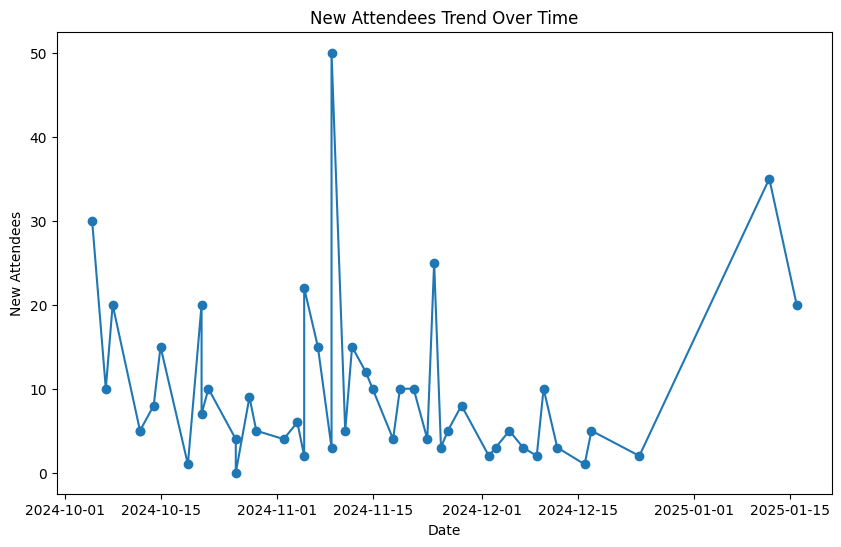

In [23]:
# Line plot for new attendees over time :

plt.figure(figsize=(10,6))
plt.plot(df_sorted['Date'], df_sorted['New Attendees'], marker='o')
plt.title('New Attendees Trend Over Time')
plt.xlabel('Date')
plt.ylabel('New Attendees')
plt.show()